In [1]:
# Librerias
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
# Obtener los datos de los precios de las "acciones" de las empresas
df = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end= '2022-05-15' )
#Mostrar la info
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.678249
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,23.983028
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,23.985277
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.321613
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.256098
...,...,...,...,...,...,...
2022-05-09,155.830002,151.490005,154.929993,152.059998,131577900.0,152.059998
2022-05-10,156.740005,152.929993,155.520004,154.509995,115366700.0,154.509995
2022-05-11,155.449997,145.809998,153.500000,146.500000,142689800.0,146.500000


In [3]:
#Filas y columnas del dataset
df.shape
(1650, 6)

(1650, 6)

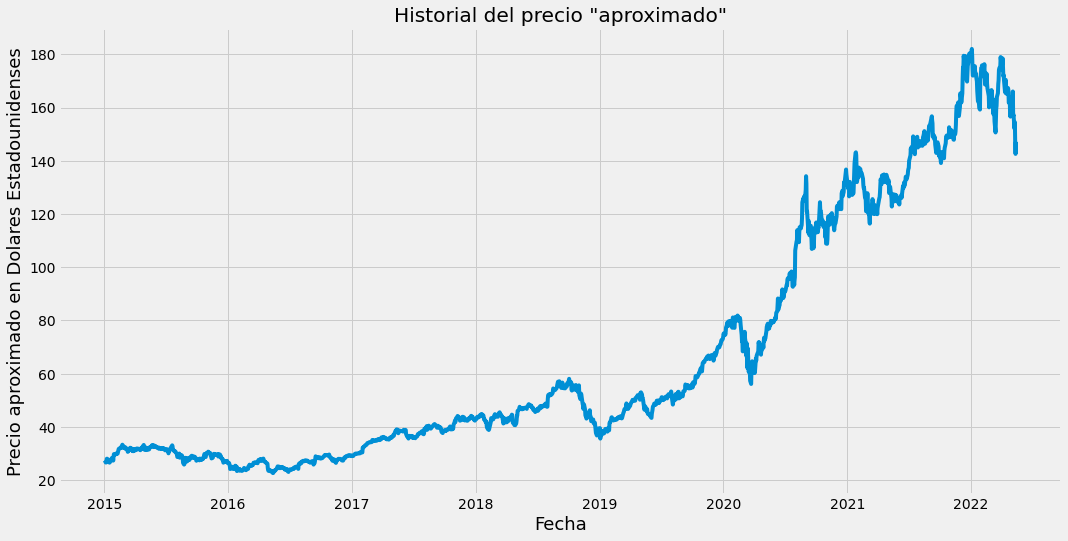

In [4]:
#Visualización  del historial del precio "aproximado" a traves de una gráfica
plt.figure(figsize=(16,8))
plt.title ('Historial del precio "aproximado"')
plt.plot (df['Close'])
plt.xlabel('Fecha', fontsize=18)
plt.ylabel ('Precio aproximado en Dolares Estadounidenses', fontsize=18)
plt.show()

In [5]:
#Creación de un nuevo dataframe utilizando solo la columna 'Close' (aproximado) de la fuente de los datos (Yahoo) 
data = df.filter (['Close'])

#Convertir el dataframe a un arreglo de numpy
dataset = data.values

#Obtener los numeros de las filas para entrenar el modelo
training_data_len = math.ceil (len(dataset) * .8)

training_data_len

1484

In [6]:
#Escalar los datos
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0297789 ],
       [0.02494904],
       [0.02496473],
       ...,
       [0.77726206],
       [0.75254823],
       [0.78108832]])

In [7]:
#Crear el set de datos del entrenamiento
#Crear el set de datos de entrenamiento por escalado
train_data = scaled_data[0:training_data_len , :]

#Dividir los datos en 2 sets de datos: x_train y y_train 
x_train = []
y_train = []

for i in range (60, len(train_data)): 
    x_train.append(train_data[i-60:i, 0]) #Aquí se contienen los pasados 60 datas
    y_train.append(train_data[i, 0]) #Aquí se va almacenar el valor numero 61, con el cual queremos que nuestro modelo realice la predicción
    if i <=61:
        print (x_train)
        print (y_train)
        print()

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.03012389, 0.03459308, 0.0355026 ,
       0.03569077, 0.02948095, 0.03915635, 0.04478596, 0.04205741,
       0.04436256, 0.04439393, 0.04582092, 0.04641682, 0.044833  ,
       0.04607183, 0.04967853, 0.0541634 , 0.05664106, 0.05761331,
       0.05878941, 0.06018505, 0.05976165, 0.06140819, 0.06689667,
       0.06559511, 0.06029481, 0.06285087, 0.05977734, 0.06076525,
       0.06118866, 0.05990277, 0.05656266, 0.0568606 , 0.05770739,
       0.0535832 , 0.05002353, 0.0534891 , 0.05214051, 0.05427317,
       0.05755058, 0.05979302, 0.05827192, 0.05576291, 0.05781716,
       0.05700174, 0.0518112 , 0.0531598 , 0.05160735, 0.05649993])]
[0.053457746504823156]

[array([0.0297789 , 0.02494904, 0.02496473, 0.02730125, 0.03379333,
       0.03398151, 0.02965345, 0.03117454, 0.03051593, 0.02584288,
       0.02454132, 0.02882234, 0.0

In [8]:
#Convertir el x_train y y_train a numpy a arreglos de numpy

x_train, y_train = np.array(x_train), np.array(y_train)

#Darle forma a los datos
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1424, 60, 1)

In [9]:
#Construir el modelo LSTM
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add (LSTM(50, return_sequences=False))
model.add (Dense(25))
model.add (Dense(1))

In [10]:
#Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')


In [11]:
#Entrenar el modelo
model.fit(x_train, y_train, batch_size=1, epochs=1)

1424/1424 [==============================] - 26s 17ms/step - loss: 7.9779e-04


In [12]:
#Crear el dataset de entrenamiento

#Creación de un nuevo arreglo que contiene los valores escalados del indice 1424 al 200
test_data = scaled_data[training_data_len - 60: , :]
#Creación de los sets de datos x_test y y_test
x_test=[]
y_test= dataset[training_data_len:, :] #Son los datos que queremos nuestro modelo predicte
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [13]:
#Convertir los datos a un arreglo de numpy
x_test = np.array (x_test)

In [14]:
#Dar forma a los datos
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1)) #El numero de muestras que se poseen, numero de time steps, y el numero de funciones, en este caso, close


In [15]:
#Predicción de los valores de las acciones a traves de los modelos
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) #Desescalado de los valores


12/12 [==============================] - 1s 11ms/step


In [16]:
#Obtención del error cuadratico medio (Root Mean Squared Error, RMSE), para medir la presición del modelo (entre menos, más preciso)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.5946118336803509

C:\Users\playe\AppData\Local\Temp\ipykernel_21904\893098699.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


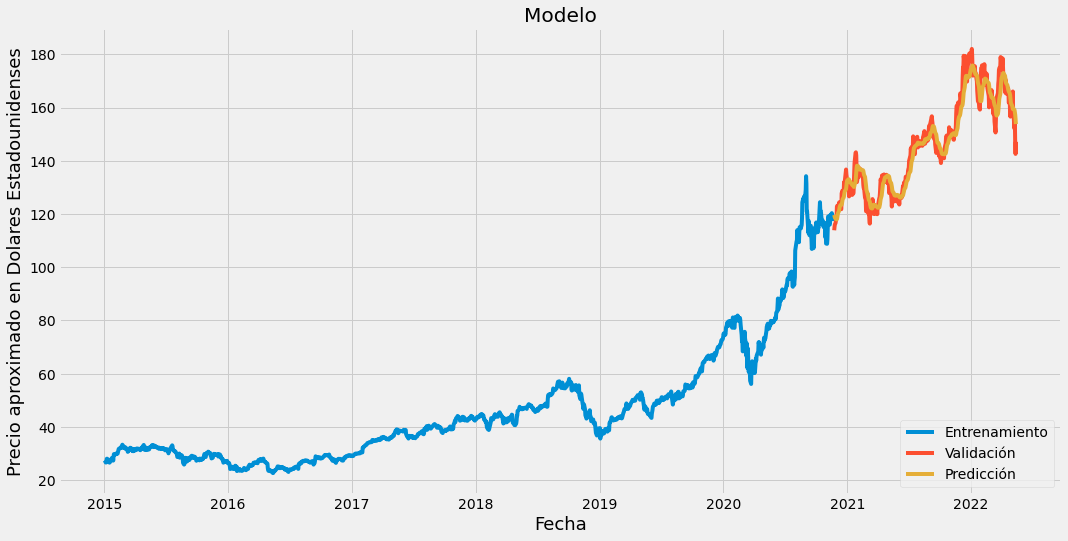

In [17]:
#Trazo de los datos (Gráfica)
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualizar el modelo
plt.figure(figsize=(16,8))
plt.title('Modelo')
plt.xlabel('Fecha', fontsize=18)
plt.ylabel ('Precio aproximado en Dolares Estadounidenses', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Entrenamiento', 'Validación', 'Predicción'], loc='lower right')
plt.show()

In [18]:
# Mostrar los valores validados ('Close') y la predicción
valid

,Close,Predictions
Date,,
2020-11-23,113.849998,119.617714
2020-11-24,115.169998,119.150772
2020-11-25,116.029999,118.635567
2020-11-27,116.589996,118.219528
2020-11-30,119.050003,117.946999
...,...,...
2022-05-09,152.059998,159.073853
2022-05-10,154.509995,158.159683
2022-05-11,146.500000,157.301025


In [19]:
#Obtener precio
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2015-01-01', end= '2022-05-15' )

#Nuevo dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Escalar los datos en valores entre 0 y 1
last_60_days_scaled = scaler.transform(last_60_days)

#Aquí creamos una lista de los ultimos 60 días
X_test =[]
X_test.append(last_60_days_scaled)

#Convertir X_test dataset a un arreglo de numpy
X_test = np.array(X_test)

#Le damos forma a los datos
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Obtener la predicción del precio escalado
pred_price = model.predict(X_test)

#Deshacemos la escala
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


1/1 [==============================] - 0s 21ms/step
[[152.08531]]


In [20]:
#Obtener precio
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-05-15', end= '2022-05-16' ) #Precio real del dia siguiente para comprobar la predicción
print (apple_quote2 ['Close'])

Date
2022-05-16    145.539993
Name: Close, dtype: float64
